    valores de fi:  [ 1.   0.9 -1.  -2.3  1.8]
divisores en L(i):  [24. -6.  4. -6. 24.]

Polinomio de Lagrange, expresiones
-0.15*x*(x - 4)*(x - 3)*(x - 2) - 0.25*x*(x - 4)*(x - 3)*(x - 1) + 0.383333333333333*x*(x - 4)*(x - 2)*(x - 1) + 0.075*x*(x - 3)*(x - 2)*(x - 1) + 0.0416666666666667*(x - 4)*(x - 3)*(x - 2)*(x - 1)

Polinomio de Lagrange: 
0.1*x**4 - 0.2*x**3 - 1.0*x**2 + 1.0*x + 1.0


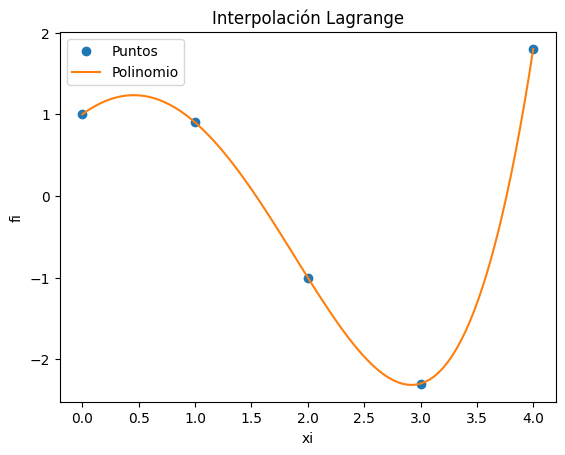

In [4]:
# Interpolacion de Lagrange
# divisoresL solo para mostrar valores
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# INGRESO , Datos de prueba
xi = np.array([0,1,2,3,4])
fi = np.array([1, 0.9, -1, -2.3, 1.8])

# PROCEDIMIENTO
# Polinomio de Lagrange
n = len(xi)
x = sym.Symbol('x')
polinomio = 0
divisorL = np.zeros(n, dtype = float)
for i in range(0,n,1):
    
    # Termino de Lagrange
    numerador = 1
    denominador = 1
    for j  in range(0,n,1):
        if (j!=i):
            numerador = numerador*(x-xi[j])
            denominador = denominador*(xi[i]-xi[j])
    terminoLi = numerador/denominador

    polinomio = polinomio + terminoLi*fi[i]
    divisorL[i] = denominador

# simplifica el polinomio
polisimple = polinomio.expand()

# para evaluación numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
print('    valores de fi: ',fi)
print('divisores en L(i): ',divisorL)
print()
print('Polinomio de Lagrange, expresiones')
print(polinomio)
print()
print('Polinomio de Lagrange: ')
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Interpolación Lagrange')
plt.show()